Práctica: Detección de Anomalías con Isolation Forest y One-Class SVM
Objetivo:
● Aplicar técnicas de detección de anomalías para identificar muestras
anómalas en el conjunto de datos Iris.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [3]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
# Añadir anomalías artificialmente a algunas muestras
np.random.seed(42)

In [5]:
anomalies_idx = np.random.choice(len(X), size=10, replace=False)
X[anomalies_idx, :] += np.random.normal(scale=5, size=(10, 4))

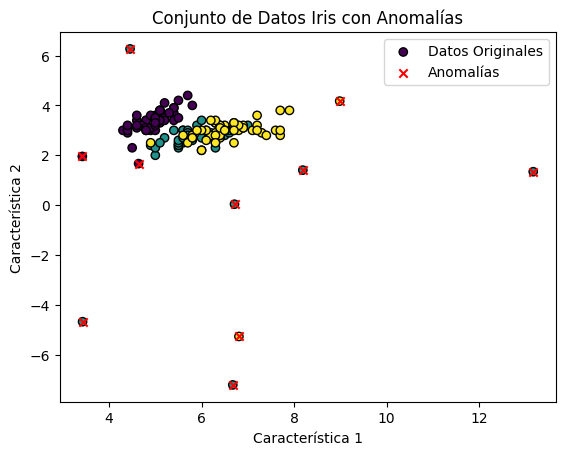

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', label='Datos Originales')
plt.scatter(X[anomalies_idx, 0], X[anomalies_idx, 1], c='r', marker='x',
label='Anomalías')
plt.title('Conjunto de Datos Iris con Anomalías')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

In [8]:
isolation_forest_model = IsolationForest(contamination=0.1,
random_state=42)
isolation_forest_model.fit(X)
isolation_forest_preds = isolation_forest_model.predict(X)
anomalies_isolation_forest = X[isolation_forest_preds == -1, :]

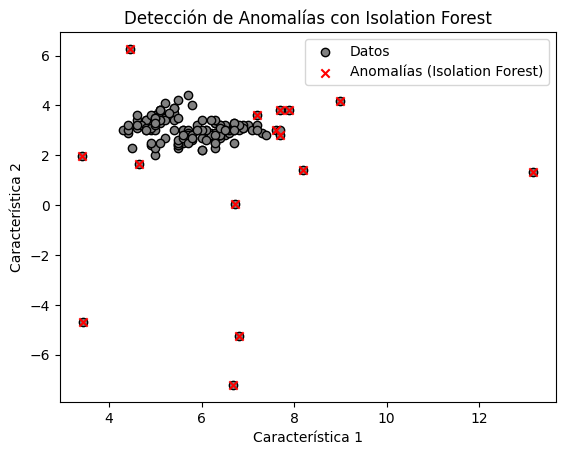

In [9]:
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='k', label='Datos')
plt.scatter(anomalies_isolation_forest[:, 0], anomalies_isolation_forest[:, 1], c='r',
marker='x', label='Anomalías (Isolation Forest)')
plt.title('Detección de Anomalías con Isolation Forest')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

Aplicar One-Class SVM:
● Utiliza el modelo One-Class SVM para detectar anomalías.

In [10]:
one_class_svm_model = OneClassSVM(nu=0.1)
one_class_svm_model.fit(X)
one_class_svm_preds = one_class_svm_model.predict(X)
anomalies_one_class_svm = X[one_class_svm_preds == -1, :]

Visualizar Resultados de One-Class SVM:
● Visualiza las muestras detectadas como anomalías por One-Class
SVM.

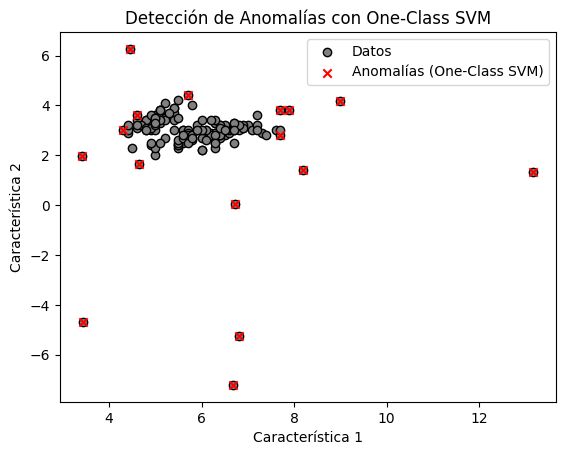

In [11]:
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='k', label='Datos')
plt.scatter(anomalies_one_class_svm[:, 0], anomalies_one_class_svm[:, 1],
c='r', marker='x', label='Anomalías (One-Class SVM)')
plt.title('Detección de Anomalías con One-Class SVM')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

In [12]:
#Explica los resultados obtenidos además de los métodos para detectar
#anomalías (debes explicarlo NO solo mencionarlo)

#El método de Isolation Forest es un método de detección de anomalías basado en árboles de decisión.
#El algoritmo funciona dividiendo el conjunto de datos en subconjuntos aleatorios y luego
#seleccionando aleatoriamente una característica y dividiendo los datos en función de un valor
#umbral óptimo. Este proceso se repite hasta que se detecta una anomalía o hasta que se alcanza
#un nivel de profundidad máximo. El algoritmo es eficiente y escalable, y funciona bien incluso
#en conjuntos de datos con muchas dimensiones. Sin embargo, el algoritmo no funciona bien en
#conjuntos de datos con muchas anomalías, y no funciona bien en conjuntos de datos con muchas
#dimensiones. El algoritmo también funciona mejor cuando las anomalías son más pequeñas que las
#muestras normales.